Podaci o podatkovnom setu nalaze se na stranici: https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure

Učitamo potrebne biblioteke:

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

%matplotlib inline

Kreiramo DataFrame i preuzimamo podatke iz csv-a.

In [2]:
csvData = "CASP.csv"
df = pd.read_csv(csvData, delimiter = ',')
df.head(10)

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147
5,1.700,5117.30,1120.99,0.21905,51.6732,6.727227e+05,79.5911,3234.21,15,41.2382
6,9.314,5924.16,1625.27,0.27434,70.2103,8.285145e+05,76.8064,2821.40,70,39.4964
7,1.985,6882.15,1791.22,0.26027,77.2501,9.165165e+05,96.6785,3490.88,74,37.4203
8,1.915,12090.00,4190.74,0.34662,129.0020,1.687508e+06,186.3090,4262.78,39,30.3916
9,1.495,7400.24,1881.95,0.25430,82.9320,1.023846e+06,104.6970,3852.40,26,35.4140


In [3]:
df.shape
df.columns = ['Size of the residue','Total surface area', 'Non polar exposed area', 'Fractional area of exposed non polar residue', 'Fractional area of exposed non polar part of residue', 'Molecular mass weighted exposed area', 'Average deviation from standard exposed area of residue', 'Euclidian distance', 'Secondary structure penalty', 'Spacial Distribution constraints (N,K Value)']
kolone = df.columns
df.head(10)

,Size of the residue,Total surface area,Non polar exposed area,Fractional area of exposed non polar residue,Fractional area of exposed non polar part of residue,Molecular mass weighted exposed area,Average deviation from standard exposed area of residue,Euclidian distance,Secondary structure penalty,"Spacial Distribution constraints (N,K Value)"
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147
5,1.700,5117.30,1120.99,0.21905,51.6732,6.727227e+05,79.5911,3234.21,15,41.2382
6,9.314,5924.16,1625.27,0.27434,70.2103,8.285145e+05,76.8064,2821.40,70,39.4964
7,1.985,6882.15,1791.22,0.26027,77.2501,9.165165e+05,96.6785,3490.88,74,37.4203
8,1.915,12090.00,4190.74,0.34662,129.0020,1.687508e+06,186.3090,4262.78,39,30.3916
9,1.495,7400.24,1881.95,0.25430,82.9320,1.023846e+06,104.6970,3852.40,26,35.4140


# Otkrivanje nedostajućih vrijednosti

In [4]:
df.isnull().sum()

Size of the residue                                        0
Total surface area                                         0
Non polar exposed area                                     0
Fractional area of exposed non polar residue               0
Fractional area of exposed non polar part of residue       0
Molecular mass weighted exposed area                       0
Average deviation from standard exposed area of residue    0
Euclidian distance                                         0
Secondary structure penalty                                0
Spacial Distribution constraints (N,K Value)               0
dtype: int64

Dobili smo broj nedostajućih vrijednosti po svakom stupcu. Kada se rade operacije s boolean tipom uz pomoć pandas biblioteke, vrijednost booleana true je 1, a false je 0. Budući da je zbroj u svakom stupcu jednak nuli, ovaj podatkovni set nema nedostajućih vrijednosti.

# Prepoznavanje distribucija

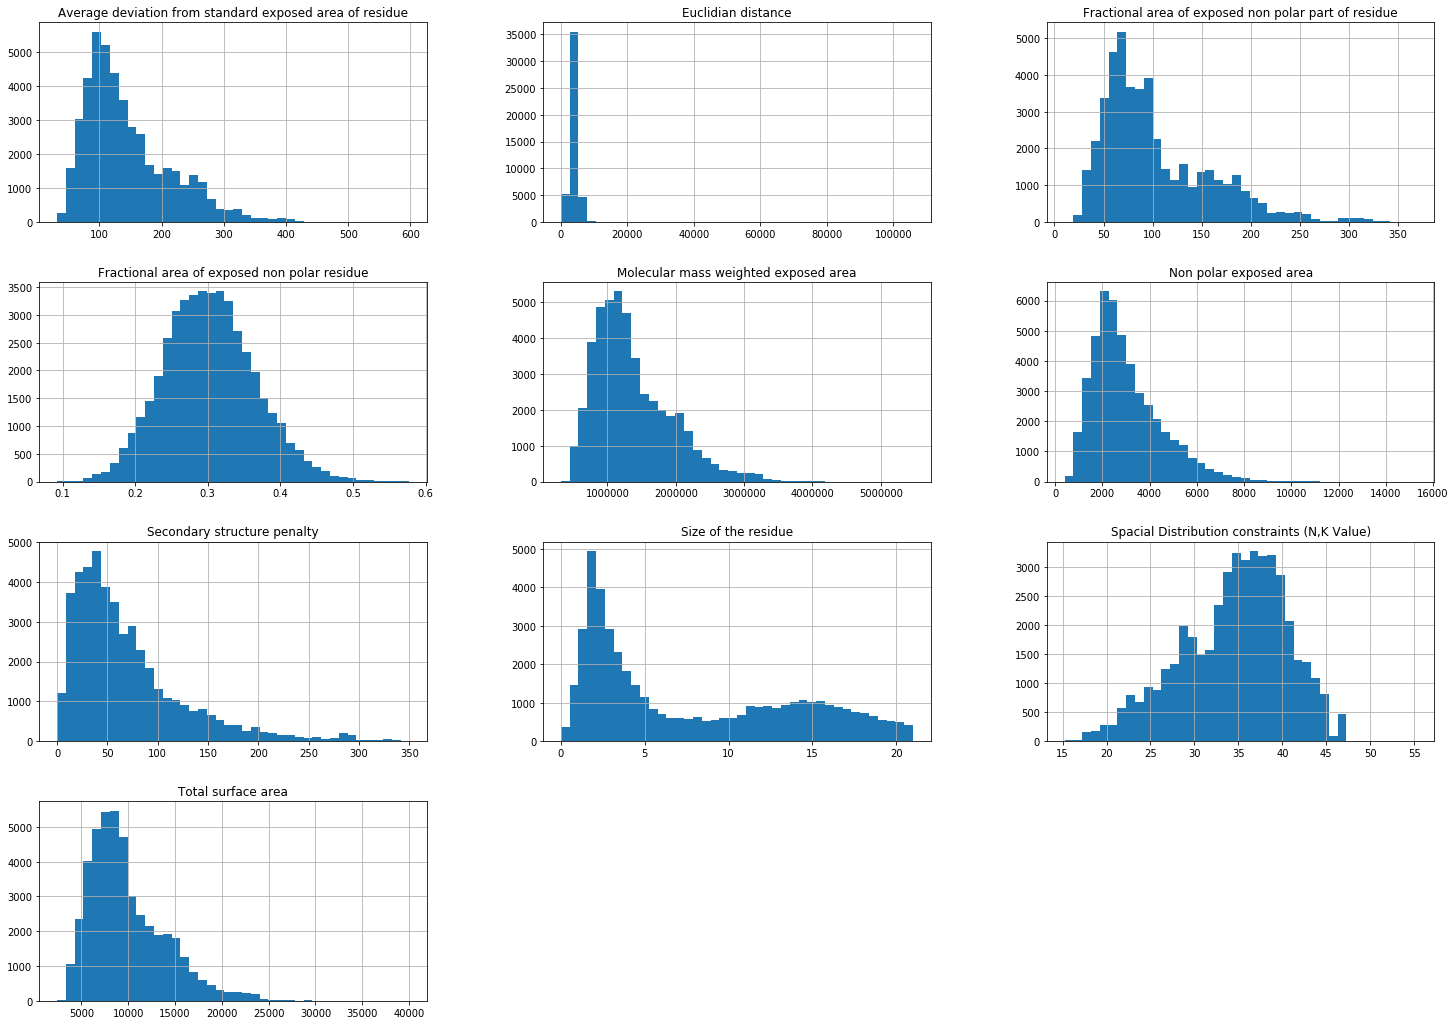

In [5]:
hist = (df.hist(figsize=(25,18), bins=40))
plt.show()

Prikazane su distribucije za svaku od varijabli.

"Fractional area of exposed non polar residue" teži ka normalnoj distribuciji.

"Size of the residue" ima oblik binominalne distribucije i vrijednosti vrhova znatno se razlikuju. 

Sve ostale varijable imaju specifičnu distribuciju koja nije niti normalna niti uniformna.

# Izračunavanje srednjih vrijednosti za svaku kontinuiranu varijablu


In [6]:
df['Size of the residue'].mean()

7.748528427728035

In [7]:
df['Total surface area'].mean()

9871.596995407914

In [8]:
df['Non polar exposed area'].mean()

3017.3671745024767

In [9]:
df['Fractional area of exposed non polar residue'].mean()

0.30239188104089315

In [10]:
df['Fractional area of exposed non polar part of residue'].mean()

103.49243300896514

In [11]:
df['Molecular mass weighted exposed area'].mean()

1368299.017205323

In [12]:
df['Average deviation from standard exposed area of residue'].mean()

145.63806119833743

In [13]:
df['Euclidian distance'].mean()

3989.755989503625

In [14]:
df['Secondary structure penalty'].mean()

69.97507106931992

In [15]:
df['Spacial Distribution constraints (N,K Value)'].mean()

34.523663662803855

# Izračunavanje zaobljenosti i nagnutosti distribucije za svaku kontinuiranu varijablu

In [16]:
for col in df.columns:
    temp_list = list(df[col])
    srv = df[col].mean()
    std_dev = df[col].std()

    suma = np.sum([pow(x - srv, 3) for x in temp_list])
    skewness = suma / (len(temp_list) * pow(std_dev, 3))
    if skewness == 0:
        print(col + " je simetrična jer je " + str(skewness))
    elif skewness > 0:
        print(col + " je pozitivno asimetrična jer je " + str(skewness))
    elif skewness < 0:
        print(col + " je negativno asimetrična jer je " + str(skewness))

Size of the residue je pozitivno asimetrična jer je 0.5664850228484526
Total surface area je pozitivno asimetrična jer je 1.092129731762723
Non polar exposed area je pozitivno asimetrična jer je 1.1905738567787107
Fractional area of exposed non polar residue je pozitivno asimetrična jer je 0.23793898518146517
Fractional area of exposed non polar part of residue je pozitivno asimetrična jer je 1.2250227694852533
Molecular mass weighted exposed area je pozitivno asimetrična jer je 1.0586975332117945
Average deviation from standard exposed area of residue je pozitivno asimetrična jer je 1.120686376864601
Euclidian distance je pozitivno asimetrična jer je 20.761282282470052
Secondary structure penalty je pozitivno asimetrična jer je 1.6828227737906578
Spacial Distribution constraints (N,K Value) je negativno asimetrična jer je -0.47261479201438905


In [17]:
for col in df.columns:
    temp_list = list(df[col])
    srv = df[col].mean()
    std_dev = df[col].std()

    suma = np.sum([pow(x - srv, 4) for x in temp_list])
    kurtosis = suma / (len(temp_list) * pow(std_dev, 4))
    if kurtosis == 3:
        print(col + " je normalna jer je " + str(kurtosis))
    elif kurtosis > 3:
        print(col + " je šiljasta jer je " + str(kurtosis))
    elif kurtosis < 3:
        print(col + " je spljoštena jer je " + str(kurtosis))

Size of the residue je spljoštena jer je 1.8577835909573215
Total surface area je šiljasta jer je 4.306537913498586
Non polar exposed area je šiljasta jer je 5.000418948170606
Fractional area of exposed non polar residue je šiljasta jer je 3.0887995258558267
Fractional area of exposed non polar part of residue je šiljasta jer je 4.334168320424706
Molecular mass weighted exposed area je šiljasta jer je 4.183176975688931
Average deviation from standard exposed area of residue je šiljasta jer je 4.083734767769913
Euclidian distance je šiljasta jer je 807.5768894334611
Secondary structure penalty je šiljasta jer je 6.305397935880231
Spacial Distribution constraints (N,K Value) je spljoštena jer je 2.7497909867613393


# Izračunavanje z vrijednosti za svaku kontinuiranu varijablu

In [18]:
cols = list(df.columns)
df[cols]

for col in cols:
    col_z = col + '-Z'
    df[col_z] = (df[col] - df[col].mean())/df[col].std()
    
df

,Size of the residue,Total surface area,Non polar exposed area,Fractional area of exposed non polar residue,Fractional area of exposed non polar part of residue,Molecular mass weighted exposed area,Average deviation from standard exposed area of residue,Euclidian distance,Secondary structure penalty,"Spacial Distribution constraints (N,K Value)",Size of the residue-Z,Total surface area-Z,Non polar exposed area-Z,Fractional area of exposed non polar residue-Z,Fractional area of exposed non polar part of residue-Z,Molecular mass weighted exposed area-Z,Average deviation from standard exposed area of residue-Z,Euclidian distance-Z,Secondary structure penalty-Z,"Spacial Distribution constraints (N,K Value)-Z"
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302,1.558514,0.908472,0.879575,0.240883,1.058739,0.894430,0.996024,0.149537,0.566879,-1.253139
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468,-0.282354,-0.906730,-0.952116,-0.640238,-0.903979,-1.001446,-0.834804,-0.331488,-0.548295,0.672793
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119,0.249492,-0.528720,-0.881695,-1.255639,-0.653202,-0.518852,-0.912107,-0.505984,-0.725307,0.717126
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651,1.324299,-0.356572,-0.443288,-0.338421,-0.643391,-0.279818,-0.517135,-0.371963,0.000441,0.759469
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147,0.034891,-0.594055,-0.874415,-1.106638,-0.921608,-0.615703,-0.730217,-0.589562,-0.512893,0.901548
5,1.700,5117.30,1120.99,0.21905,51.6732,6.727227e+05,79.5911,3234.21,15,41.2382,-0.988594,-1.171546,-1.295052,-1.325289,-0.934944,-1.233211,-0.943538,-0.378991,-0.973123,1.122878
6,9.314,5924.16,1625.27,0.27434,70.2103,8.285145e+05,76.8064,2821.40,70,39.4964,0.255867,-0.972721,-0.950675,-0.446076,-0.600490,-0.957002,-0.983320,-0.586061,0.000441,0.831595
7,1.985,6882.15,1791.22,0.26027,77.2501,9.165165e+05,96.6785,3490.88,74,37.4203,-0.942013,-0.736655,-0.837347,-0.669815,-0.473475,-0.800981,-0.699430,-0.250242,0.071246,0.484407
8,1.915,12090.00,4190.74,0.34662,129.0020,1.687508e+06,186.3090,4262.78,39,30.3916,-0.953454,0.546655,0.801306,0.703308,0.460254,0.565937,0.581020,0.136952,-0.548295,-0.691009
9,1.495,7400.24,1881.95,0.25430,82.9320,1.023846e+06,104.6970,3852.40,26,35.4140,-1.022100,-0.608988,-0.775386,-0.764749,-0.370960,-0.610693,-0.584879,-0.068899,-0.778410,0.148892


# Ciljna varijabla

Ciljna varijabla napravljena je na temelju kolone Spacial Distribution constraints (N,K Value). Ako je vrijednost manja od mediana iste te kolone onda je ciljna varijabla 0, u suprotnom je 1.

In [19]:
ciljna_uvjet = df['Spacial Distribution constraints (N,K Value)'].median()

In [20]:
df['ciljna'] = 0

In [21]:
df['ciljna'] = df['Spacial Distribution constraints (N,K Value)'].apply(lambda x: 0 if x < ciljna_uvjet else 1)

In [22]:
df[['Spacial Distribution constraints (N,K Value)', 'ciljna']].head()

,"Spacial Distribution constraints (N,K Value)",ciljna
0,27.0302,0
1,38.5468,1
2,38.8119,1
3,39.0651,1
4,39.9147,1


# Koreliranost

Sada ćemo izvršiti test korelacije svih originalnih varijabli s ciljnom varijablom.

In [23]:
for kol in kolone:
    print(kol, pearsonr(df[kol], df['ciljna'])[0])

Size of the residue 0.08969941799766862
Total surface area -0.7043434891068391
Non polar exposed area -0.6016054784295839
Fractional area of exposed non polar residue -0.018171879505110292
Fractional area of exposed non polar part of residue -0.6897749227285284
Molecular mass weighted exposed area -0.7076436839088674
Average deviation from standard exposed area of residue -0.6873788931082091
Euclidian distance -0.4291378529236755
Secondary structure penalty -0.4699922803352861
Spacial Distribution constraints (N,K Value) 0.7980955304644327


Sada ćemo izvršiti test korelacije svih  z-varijabli s ciljnom varijablom.

In [24]:
sve_kolone = list(df.columns)

In [25]:
sve_kolone.remove('ciljna')

In [26]:
z_kolone = [ kol for kol in sve_kolone if kol not in kolone]

In [27]:
for z in z_kolone:
    print(z, pearsonr(df[z], df['ciljna'])[0])

Size of the residue-Z 0.08969941799766859
Total surface area-Z -0.704343489106839
Non polar exposed area-Z -0.6016054784295839
Fractional area of exposed non polar residue-Z -0.018171879505110292
Fractional area of exposed non polar part of residue-Z -0.6897749227285283
Molecular mass weighted exposed area-Z -0.7076436839088674
Average deviation from standard exposed area of residue-Z -0.6873788931082091
Euclidian distance-Z -0.42913785292367546
Secondary structure penalty-Z -0.46999228033528617
Spacial Distribution constraints (N,K Value)-Z 0.7980955304644328


# Weight of Evidence i Information Value

In [28]:
kolone

Index(['Size of the residue', 'Total surface area', 'Non polar exposed area',
       'Fractional area of exposed non polar residue',
       'Fractional area of exposed non polar part of residue',
       'Molecular mass weighted exposed area',
       'Average deviation from standard exposed area of residue',
       'Euclidian distance', 'Secondary structure penalty',
       'Spacial Distribution constraints (N,K Value)'],
      dtype='object')

### Size of the residue

In [61]:
SotR_bin = pd.qcut(df['Size of the residue'], 2)

In [62]:
#SotR_bin

In [63]:
df['SotR_bin'] = SotR_bin
df['SotR_bin'] = df['SotR_bin'].astype(str)
#df.info()

In [64]:
#df['SotR_bin'].describe()

In [65]:
SotR = pd.crosstab(df['SotR_bin'], df['ciljna']).apply(lambda c: c/c.sum(), axis=0)

SotR[0] = SotR[1].replace(0, 0.000001)
SotR[1] = SotR[1].replace(0, 0.000001)

In [66]:
SotR

ciljna,0,1
SotR_bin,,
"(-0.001, 5.03]",0.408834,0.408834
"(5.03, 20.999]",0.591166,0.591166


In [67]:
SotR['WoE'] = np.log(SotR[1]/SotR[0])
SotR['IV'] = (SotR[1] - SotR[0]) * np.log(SotR[1]/SotR[0])

In [326]:
print('IV: ', SotR['IV'].sum())

IV:  0.0


In [69]:
SotR

ciljna,0,1,WoE,IV
SotR_bin,,,,
"(-0.001, 5.03]",0.408834,0.408834,0.0,0.0
"(5.03, 20.999]",0.591166,0.591166,0.0,0.0


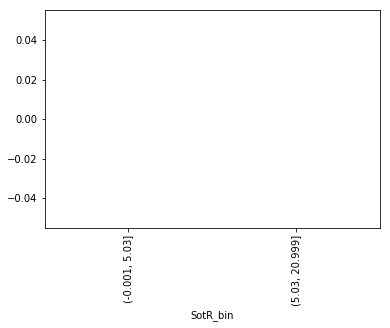

In [73]:
SotR['WoE'].plot(kind='bar')
plt.show()

### Total surface area

In [104]:
TSA_bin = pd.qcut(df['Total surface area'], 5)

df['TSA_bin'] = TSA_bin
df['TSA_bin'] = df['TSA_bin'].astype(str)

In [105]:
TSA = pd.crosstab(df['TSA_bin'], df['ciljna']).apply(lambda c: c/c.sum(), axis=0)

In [106]:
TSA[0] = TSA[0].replace(0, 0.000001)
TSA[1] = TSA[1].replace(0, 0.000001)
TSA

ciljna,0,1
TSA_bin,,
"(13208.74, 40034.9]",0.394577,0.005423
"(2392.049, 6489.286]",0.002012,0.397988
"(6489.286, 8114.012]",0.036694,0.363306
"(8114.012, 9793.496]",0.208966,0.191034
"(9793.496, 13208.74]",0.357752,0.042248


In [327]:
TSA['WoE'] = np.log(TSA[1]/TSA[0])
TSA['IV'] = (TSA[1] - TSA[0]) * np.log(TSA[1]/TSA[0])
print('IV:', TSA['IV'].sum())
TSA

IV: 5.186458587752653


ciljna,0,1,WoE,IV
TSA_bin,,,,
"(13208.74, 40034.9]",0.394577,0.005423,-4.287140,1.668356
"(2392.049, 6489.286]",0.002012,0.397988,5.287388,2.093681
"(6489.286, 8114.012]",0.036694,0.363306,2.292643,0.748806
"(8114.012, 9793.496]",0.208966,0.191034,-0.089717,0.001609
"(9793.496, 13208.74]",0.357752,0.042248,-2.136284,0.674006


In [108]:
pearsonr(df['Total surface area'], df['ciljna'])

(-0.7043434891068391, 0.0)

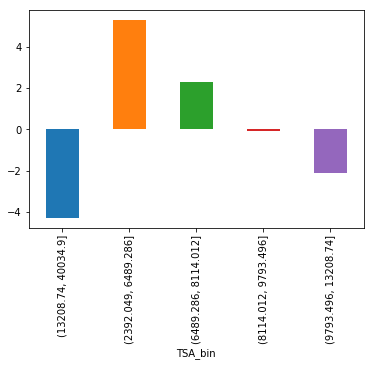

In [109]:
TSA['WoE'].plot(kind='bar')
plt.show()

In [336]:
pearsonr(df['Total surface area'], df['ciljna'])

(-0.7043434891068391, 0.0)

### Non polar exposed area

In [135]:
NPEA_bin = pd.qcut(df['Non polar exposed area'], 5)

df['NPEA_bin'] = NPEA_bin
df['NPEA_bin'] = df['NPEA_bin'].astype(str)

In [136]:
NPEA = pd.crosstab(df['NPEA_bin'], df['ciljna']).apply(lambda c: c/c.sum(), axis=0)

NPEA[0] = NPEA[0].replace(0, 0.000001)
NPEA[1] = NPEA[1].replace(0, 0.000001)

In [137]:
NPEA

ciljna,0,1
NPEA_bin,,
"(1829.836, 2379.386]",0.101246,0.298754
"(2379.386, 3028.106]",0.193352,0.206648
"(3028.106, 4127.674]",0.300503,0.099497
"(403.499, 1829.836]",0.024798,0.375202
"(4127.674, 15312.0]",0.380101,0.019899


In [328]:
NPEA['WoE'] = np.log(NPEA[1]/NPEA[0])
NPEA['IV'] = (NPEA[1] - NPEA[0]) * np.log(NPEA[1]/NPEA[0])
print('IV: ', NPEA['IV'].sum())
NPEA

IV:  2.4512274116465322


ciljna,0,1,WoE,IV
NPEA_bin,,,,
"(1829.836, 2379.386]",0.101246,0.298754,1.082061,0.213715
"(2379.386, 3028.106]",0.193352,0.206648,0.066502,0.000884
"(3028.106, 4127.674]",0.300503,0.099497,-1.105330,0.222178
"(403.499, 1829.836]",0.024798,0.375202,2.716713,0.951949
"(4127.674, 15312.0]",0.380101,0.019899,-2.949746,1.062502


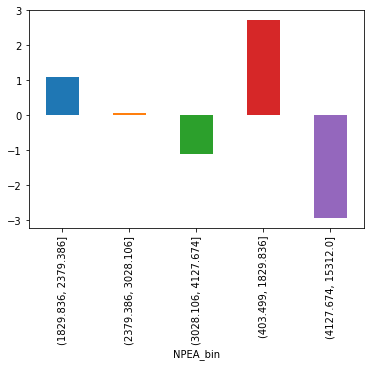

In [139]:
NPEA['WoE'].plot(kind='bar')
plt.show()

In [337]:
pearsonr(df['Non polar exposed area'], df['ciljna'])

(-0.6016054784295839, 0.0)

### Fractional area of exposed non polar residue

In [159]:
FAENPR_bin = pd.qcut(df['Fractional area of exposed non polar residue'], 4)

In [160]:
df['FAENPR_bin'] = FAENPR_bin
df['FAENPR_bin'] = df['FAENPR_bin'].astype(str)

In [161]:
FAENPR = pd.crosstab(df['FAENPR_bin'], df['ciljna']).apply(lambda c: c/c.sum(), axis=0)

FAENPR[0] = FAENPR[0].replace(0, 0.000001)
FAENPR[1] = FAENPR[1].replace(0, 0.000001)

FAENPR

ciljna,0,1
FAENPR_bin,,
"(0.0915, 0.259]",0.231533,0.268533
"(0.259, 0.3]",0.265602,0.234376
"(0.3, 0.343]",0.258692,0.241286
"(0.343, 0.578]",0.244172,0.255806


In [329]:
FAENPR['WoE'] = np.log(FAENPR[1]/FAENPR[0])
FAENPR['IV'] = (FAENPR[1] - FAENPR[0]) * np.log(FAENPR[1]/FAENPR[0])
print('IV: ', FAENPR['IV'].sum())
FAENPR

IV:  0.011144904216233568


ciljna,0,1,WoE,IV
FAENPR_bin,,,,
"(0.0915, 0.259]",0.231533,0.268533,0.148251,0.005485
"(0.259, 0.3]",0.265602,0.234376,-0.125075,0.003906
"(0.3, 0.343]",0.258692,0.241286,-0.069657,0.001212
"(0.343, 0.578]",0.244172,0.255806,0.046544,0.000541


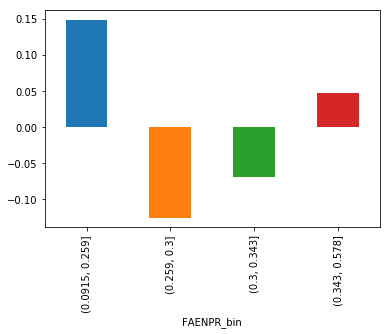

In [163]:
FAENPR['WoE'].plot(kind='bar')
plt.show()

In [338]:
pearsonr(df['Fractional area of exposed non polar residue'], df['ciljna'])

(-0.018171879505110292, 0.00010182829621778522)

### Fractional area of exposed non polar part of residue

In [189]:
FAENPPR_bin = pd.qcut(df['Fractional area of exposed non polar part of residue'], 5)

In [190]:
df['FAENPPR_bin'] = FAENPPR_bin
df['FAENPPR_bin'] = df['FAENPPR_bin'].astype(str)

In [191]:
FAENPPR = pd.crosstab(df['FAENPPR_bin'], df['ciljna']).apply(lambda c: c/c.sum(), axis=0)

FAENPPR[0] = FAENPPR[0].replace(0, 0.000001)
FAENPPR[1] = FAENPPR[1].replace(0, 0.000001)

FAENPPR

ciljna,0,1
FAENPPR_bin,,
"(10.309000000000001, 59.257]",0.005073,0.394927
"(151.533, 369.317]",0.395145,0.004811
"(59.257, 76.042]",0.051170,0.348830
"(76.042, 98.038]",0.186267,0.213733
"(98.038, 151.533]",0.362344,0.037700


In [330]:
FAENPPR['WoE'] = np.log(FAENPPR[1]/FAENPPR[0])
FAENPPR['IV'] = (FAENPPR[1] - FAENPPR[0]) * np.log(FAENPPR[1]/FAENPPR[0])
print('IV: ', FAENPPR['IV'].sum())
FAENPPR

IV:  4.728215356430076


ciljna,0,1,WoE,IV
FAENPPR_bin,,,,
"(10.309000000000001, 59.257]",0.005073,0.394927,4.354717,1.697702
"(151.533, 369.317]",0.395145,0.004811,-4.408381,1.720743
"(59.257, 76.042]",0.051170,0.348830,1.919433,0.571339
"(76.042, 98.038]",0.186267,0.213733,0.137544,0.003778
"(98.038, 151.533]",0.362344,0.037700,-2.262947,0.734654


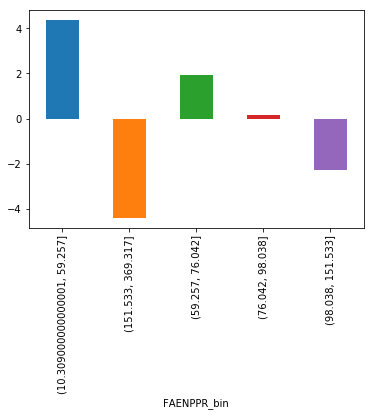

In [193]:
FAENPPR['WoE'].plot(kind='bar')
plt.show()

In [339]:
pearsonr(df['Fractional area of exposed non polar part of residue'], df['ciljna'])

(-0.6897749227285284, 0.0)

### Molecular mass weighted exposed area

In [220]:
MMWEA_bin = pd.qcut(df['Molecular mass weighted exposed area'], 6)

In [221]:
df['MMWEA_bin'] = MMWEA_bin
df['MMWEA_bin'] = df['MMWEA_bin'].astype(str)

In [222]:
MMWEA = pd.crosstab(df['MMWEA_bin'], df['ciljna']).apply(lambda c: c/c.sum(), axis=0)

MMWEA[0] = MMWEA[0].replace(0, 0.000001)
MMWEA[1] = MMWEA[1].replace(0, 0.000001)

MMWEA

ciljna,0,1
MMWEA_bin,,
"(1051487.251, 1237219.064]",0.097092,0.236213
"(1237219.064, 1483270.482]",0.242029,0.091319
"(1483270.482, 1936187.72]",0.315635,0.017669
"(1936187.72, 5472011.408]",0.329062,0.004286
"(319490.216, 852192.081]",0.001050,0.332342
"(852192.081, 1051487.251]",0.015132,0.318172


In [331]:
MMWEA['WoE'] = np.log(MMWEA[1]/MMWEA[0])
MMWEA['IV'] = (MMWEA[1] - MMWEA[0]) * np.log(MMWEA[1] / MMWEA[0])
print('IV: ', MMWEA['IV'].sum())
MMWEA

IV:  5.369847718651432


ciljna,0,1,WoE,IV
MMWEA_bin,,,,
"(1051487.251, 1237219.064]",0.097092,0.236213,0.889077,0.123689
"(1237219.064, 1483270.482]",0.242029,0.091319,-0.974704,0.146898
"(1483270.482, 1936187.72]",0.315635,0.017669,-2.882780,0.858971
"(1936187.72, 5472011.408]",0.329062,0.004286,-4.340886,1.409815
"(319490.216, 852192.081]",0.001050,0.332342,5.757718,1.907488
"(852192.081, 1051487.251]",0.015132,0.318172,3.045760,0.922986


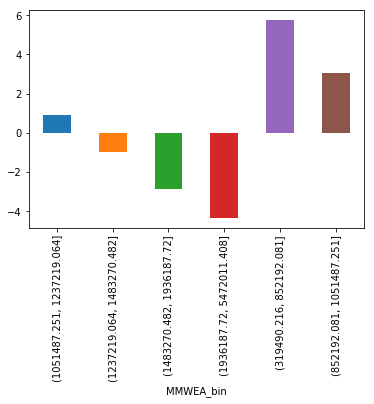

In [224]:
MMWEA['WoE'].plot(kind='bar')
plt.show()

In [340]:
pearsonr(df['Molecular mass weighted exposed area'], df['ciljna'])

(-0.7076436839088674, 0.0)

### Average deviation from standard exposed area of residue

In [252]:
ADFSEAR_bin = pd.qcut(df['Average deviation from standard exposed area of residue'], 5)

In [253]:
df['ADFSEAR_bin'] = ADFSEAR_bin
df['ADFSEAR_bin'] = df['ADFSEAR_bin'].astype(str)

In [254]:
ADFSEAR = pd.crosstab(df['ADFSEAR_bin'], df['ciljna']).apply(lambda c: c/c.sum(), axis=0)

ADFSEAR[0] = ADFSEAR[0].replace(0, 0.000001)
ADFSEAR[1] = ADFSEAR[1].replace(0, 0.000001)

ADFSEAR

ciljna,0,1
ADFSEAR_bin,,
"(112.469, 143.387]",0.189635,0.210365
"(143.387, 204.254]",0.351760,0.048240
"(204.254, 598.408]",0.393615,0.006385
"(31.968999999999998, 88.69]",0.003805,0.396195
"(88.69, 112.469]",0.061185,0.338815


In [332]:
ADFSEAR['WoE'] = np.log(ADFSEAR[1]/ADFSEAR[0])
ADFSEAR['IV'] = (ADFSEAR[1] - ADFSEAR[0]) * np.log(ADFSEAR[1] / ADFSEAR[0])
print('IV: ', ADFSEAR['IV'].sum())
ADFSEAR

IV:  4.499158936820358


ciljna,0,1,WoE,IV
ADFSEAR_bin,,,,
"(112.469, 143.387]",0.189635,0.210365,0.103745,0.002151
"(143.387, 204.254]",0.351760,0.048240,-1.986768,0.603025
"(204.254, 598.408]",0.393615,0.006385,-4.121373,1.595917
"(31.968999999999998, 88.69]",0.003805,0.396195,4.645606,1.822890
"(88.69, 112.469]",0.061185,0.338815,1.711548,0.475176


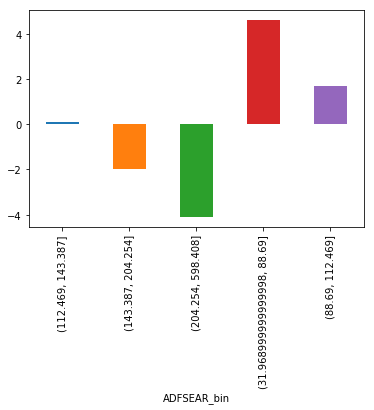

In [256]:
ADFSEAR['WoE'].plot(kind='bar')
plt.show()

In [341]:
pearsonr(df['Average deviation from standard exposed area of residue'], df['ciljna'])

(-0.6873788931082091, 0.0)

### Euclidian distance

In [275]:
ED_bin = pd.qcut(df['Euclidian distance'], 4)

In [276]:
df['ED_bin'] = ED_bin
df['ED_bin'] = df['ED_bin'].astype(str)

In [277]:
ED = pd.crosstab(df['ED_bin'], df['ciljna']).apply(lambda c: c/c.sum(), axis=0)

ED[0] = ED[0].replace(0, 0.000001)
ED[1] = ED[1].replace(0, 0.000001)

ED

ciljna,0,1
ED_bin,,
"(-0.001, 3165.322]",0.004767,0.495255
"(3165.322, 3840.17]",0.100984,0.399038
"(3840.17, 4644.192]",0.413164,0.086770
"(4644.192, 105948.17]",0.481085,0.018937


In [333]:
ED['WoE'] = np.log(ED[1]/ED[0])
ED['IV'] = (ED[1] - ED[0]) * np.log(ED[1] / ED[0])
print('IV: ', ED['IV'].sum())
ED

IV:  4.691421987077299


ciljna,0,1,WoE,IV
ED_bin,,,,
"(-0.001, 3165.322]",0.004767,0.495255,4.643332,2.277497
"(3165.322, 3840.17]",0.100984,0.399038,1.374094,0.409554
"(3840.17, 4644.192]",0.413164,0.086770,-1.560582,0.509365
"(4644.192, 105948.17]",0.481085,0.018937,-3.234913,1.495007


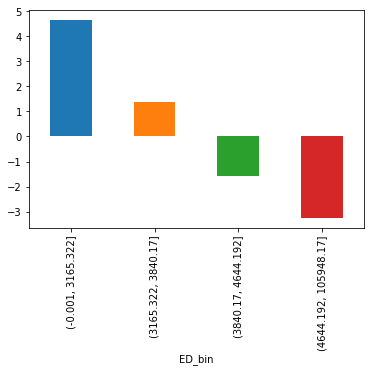

In [279]:
ED['WoE'].plot(kind='bar')
plt.show()

In [342]:
pearsonr(df['Euclidian distance'], df['ciljna'])

(-0.4291378529236755, 0.0)

### Secondary structure penalty

In [297]:
SSP_bin = pd.qcut(df['Secondary structure penalty'], 4)

In [298]:
df['SSP_bin'] = SSP_bin
df['SSP_bin'] = df['SSP_bin'].astype(str)

In [299]:
SSP = pd.crosstab(df['SSP_bin'], df['ciljna']).apply(lambda c: c/c.sum(), axis=0)

SSP[0] = SSP[0].replace(0, 0.000001)
SSP[1] = SSP[1].replace(0, 0.000001)

SSP

ciljna,0,1
SSP_bin,,
"(-0.001, 31.0]",0.125563,0.390859
"(31.0, 54.0]",0.177608,0.312224
"(54.0, 91.0]",0.257774,0.241723
"(91.0, 350.0]",0.439055,0.055194


In [334]:
SSP['WoE'] = np.log(SSP[1]/SSP[0])
SSP['IV'] = (SSP[1] - SSP[0]) * np.log(SSP[1] / SSP[0])
print('IV: ', SSP['IV'].sum())
SSP

IV:  1.1742740296381102


ciljna,0,1,WoE,IV
SSP_bin,,,,
"(-0.001, 31.0]",0.125563,0.390859,1.135540,0.301254
"(31.0, 54.0]",0.177608,0.312224,0.564143,0.075943
"(54.0, 91.0]",0.257774,0.241723,-0.064290,0.001032
"(91.0, 350.0]",0.439055,0.055194,-2.073780,0.796045


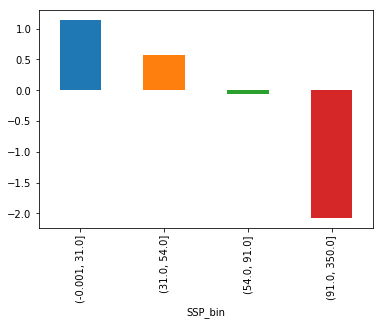

In [301]:
SSP['WoE'].plot(kind='bar')
plt.show()

In [343]:
pearsonr(df['Secondary structure penalty'], df['ciljna'])

(-0.4699922803352861, 0.0)

### Spacial Distribution constraints (N,K Value)

In [321]:
SDC_bin = pd.qcut(df['Spacial Distribution constraints (N,K Value)'], 2)

In [322]:
df['SDC_bin'] = SDC_bin
df['SDC_bin'] = df['SDC_bin'].astype(str)

In [323]:
SDC = pd.crosstab(df['SDC_bin'], df['ciljna']).apply(lambda c: c/c.sum(), axis=0)

SDC[0] = SDC[0].replace(0, 0.000001)
SDC[1] = SDC[1].replace(0, 0.000001)

SDC

ciljna,0,1
SDC_bin,,
"(15.227, 35.299]",1.000000,0.000001
"(35.299, 55.301]",0.000001,1.000000


In [335]:
SDC['WoE'] = np.log(SDC[1]/SDC[0])
SDC['IV'] = (SDC[1] - SDC[0]) * np.log(SDC[1] / SDC[0])
print('IV: ', SDC['IV'].sum())
SDC

IV:  27.63099348490743


ciljna,0,1,WoE,IV
SDC_bin,,,,
"(15.227, 35.299]",1.000000,0.000001,-13.815511,13.815497
"(35.299, 55.301]",0.000001,1.000000,13.815511,13.815497


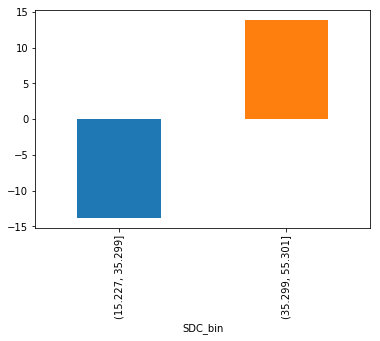

In [325]:
SDC['WoE'].plot(kind='bar')
plt.show()

In [344]:
pearsonr(df['Spacial Distribution constraints (N,K Value)'], df['ciljna'])

(0.7980955304644327, 0.0)

# Zaključak

Varijable "Size of residue" i "Fractional area of exposed non polar residue" imaju slabu tj. gotovo nikakvu prediktivnu moć zbog preniskog IV. 

Varijabla "Secondary structure penalty" ima relativno dobar IV jer ne odstupa puno od gornje granice.

Sve ostale varijable imaju preveliki IV što bi moglo dovest do overheatanja modela.